In [7]:
import numpy as np
import matplotlib.pyplot as plt
import GPy as gpy

np.random.seed(6)
n = 100
X = np.random.rand(n,2) * 4 - 2
Y = np.sum(np.sin(X * 2 + 1), axis=-1).reshape(n, -1)

noise_std = .02
Y =  Y + np.random.randn(n,1) * noise_std

# Censored train/test split
censor_threshold = -1.5
mask = (X[:, 0] < censor_threshold) | (X[:, 1] < censor_threshold)
X_train = X[mask]
Y_train = Y[mask]
X_test = X[~mask]
Y_test = Y[~mask]

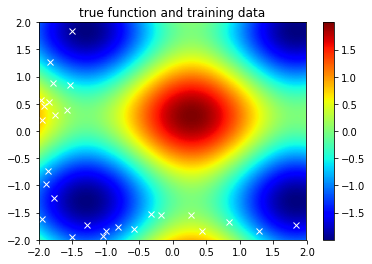

In [8]:
# plot true functions and train data
# plt.rc('figure', figsize=(12, 8))
range = np.arange(-2, 2, 0.005)
X_plot = np.asarray(np.meshgrid(range, range))
Z = np.zeros((800, 800))
Z = np.sum(np.sin(X_plot * 2 + 1), axis=0)
plt.pcolormesh(X_plot[0], X_plot[1], Z, cmap='jet')
plt.colorbar()
plt.plot(X_train[:, 0], X_train[:, 1], 'x', color='white')
plt.title("true function and training data")
plt.show()

Optimization restart 1/10, f = -21.07993853331839
Optimization restart 2/10, f = -21.079938533198003
Optimization restart 3/10, f = -21.079938533369823
Optimization restart 4/10, f = -21.079938532852005
Optimization restart 5/10, f = -21.07993853306104
Optimization restart 6/10, f = -21.07993853315771
Optimization restart 7/10, f = -21.079938532703327
Optimization restart 8/10, f = -21.07993853329949
Optimization restart 9/10, f = -21.079938530632663
Optimization restart 10/10, f = -21.0799385333499


GP_regression.,value,constraints,priors
sum.rbf.variance,2.241002596120661,+ve,
sum.rbf.lengthscale,1.157065447149687,+ve,
sum.rbf_1.variance,1.3325690846445877,+ve,
sum.rbf_1.lengthscale,0.9629196634484275,+ve,
Gaussian_noise.variance,0.00037334610756627906,+ve,


 /Users/jingxixu/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning:The following kwargs were not used by contour: 'label', 'linewidth'
 /Users/jingxixu/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


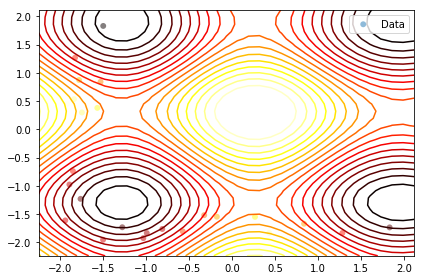

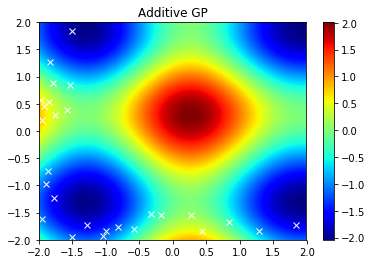

In [9]:
# train using 1st-order additive kernel
kernel1 = gpy.kern.RBF(input_dim=1, active_dims=[0])
kernel2 = gpy.kern.RBF(input_dim=1, active_dims=[1])
kernel_additive = kernel1 + kernel2

m_additive = gpy.models.GPRegression(X_train, Y_train, kernel_additive)
m_additive.optimize_restarts(num_restarts = 10)
display(m_additive)
m_additive.plot()
plt.show()

X_plot_2d = np.hstack([X_plot[0].reshape(-1, 1), X_plot[1].reshape(-1, 1)])
Z = m_additive.predict(X_plot_2d)[0]
plt.pcolormesh(range, range, Z.reshape(range.shape[0], range.shape[0]), cmap='jet')
plt.colorbar()
plt.plot(X_train[:, 0], X_train[:, 1], 'x', color='white')
plt.title("Additive GP")
plt.show()

Optimization restart 1/10, f = -21.0799385333803
Optimization restart 2/10, f = -21.07993853165913
Optimization restart 3/10, f = -21.079938533254776
Optimization restart 4/10, f = -21.07993853308292
Optimization restart 5/10, f = 0.2753232149669529
Optimization restart 6/10, f = -21.079938533307285
Optimization restart 7/10, f = -21.07993853334352
Optimization restart 8/10, f = -21.079938532853483
Optimization restart 9/10, f = -21.079938532355637
Optimization restart 10/10, f = -21.07993852192352


GP_regression.,value,constraints,priors
sum.rbf.variance,2.241002656985281,+ve,
sum.rbf.lengthscale,1.1570650794892416,+ve,
sum.rbf_1.variance,1.3325690631921263,+ve,
sum.rbf_1.lengthscale,0.96291971376893,+ve,
Gaussian_noise.variance,0.0003733461370276241,+ve,


 /Users/jingxixu/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning:The following kwargs were not used by contour: 'label', 'linewidth'
 /Users/jingxixu/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


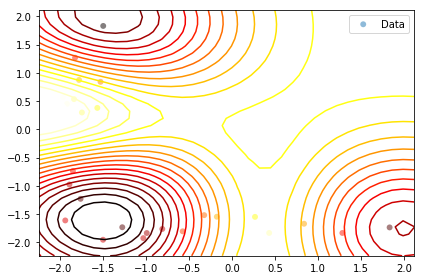

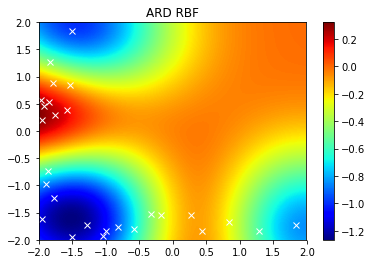

In [10]:
## train using ARD kernel
kernel_ard = gpy.kern.RBF(input_dim=2, ARD=True)
m_ard = gpy.models.GPRegression(X_train, Y_train, kernel_ard)
m_additive.optimize_restarts(num_restarts = 10)
display(m_additive)
m_ard.plot(plot_density=True)
plt.show()

X_plot_2d = np.hstack([X_plot[0].reshape(-1, 1), X_plot[1].reshape(-1, 1)])
Z = m_ard.predict(X_plot_2d)[0]
plt.pcolormesh(range, range, Z.reshape(range.shape[0], range.shape[0]), cmap='jet')
plt.colorbar()
plt.plot(X_train[:, 0], X_train[:, 1], 'x', color='white')
plt.title("ARD RBF")
plt.show()